- 실습 데이터 다운받는 곳
[https://github.com/easysIT/doit_pandas](https://github.com/easysIT/doit_pandas)

- #책의 pandas 버전 0.23.0

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/gapminder.tsv',sep='\t')

# 2.판다스 시작하기 

In [0]:
# 데이터 요약 5줄 살펴보기
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [0]:
# 데이터 shape (행, 열)
print(df.shape)

(1704, 6)


In [0]:
# 열의 이름 확인
print(df.columns)
# 자료형 확인
print(df.dtypes)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [0]:
# 전체 확인
print(df.info)

<bound method DataFrame.info of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>


In [0]:
#Practice

# 열 단위 데이터 추출하기

column_extract = df['country']

print(column_extract.head())
print(column_extract.shape)
print(column_extract.tail())

# 이런 식으로 하나 이상의 열 데이터를 추출이 가능하다.

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
(1704,)
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [0]:
# 행을 불러 추출하기

# loc 인덱스를 기준으로 행 데이터 추출 (음수가 불가능)
# iloc 행 번호를 기준으로 행 데이터를 추출 (음수가 가능 : 음수는 뒤에서부터의 데이터를 가져옴. ex) 리스트 )

print(df.loc[0])
print(df.iloc[0])

# 여러 인덱스의 데이터
#print(df.loc[[0,99,999]])
#print(df.iloc[[0,99,999]])

#Tip : tail 메서드는 dataframe, loc은 Series 의 자료형을 가짐!!

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


In [0]:
# df.loc[[행],[열]] ,  df.iloc[[행],[열]]

# 슬라이싱 구문으로 데이터 추출하기

# 모든행에 대해서 추출

subset = df.loc[:,['year','pop']] # 행, 열
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [0]:
# range 구문으로 데이터 추출하기

small_range = list(range(5))
print(small_range)

subset = df.iloc[:,small_range]
print(subset.head())

[0, 1, 2, 3, 4]
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [0]:
# 슬라이스를 더 선호
sub = df.iloc[:,0:3]
print(sub.head())

subset = df.iloc[:,1:3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
  continent  year
0      Asia  1952
1      Asia  1957
2      Asia  1962
3      Asia  1967
4      Asia  1972


In [0]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산하기

print(df.groupby('year')['lifeExp'].mean())

# gdpPercap 까지 한 번에 평균 계산하기

twice_m = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

print(twice_m)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5

In [0]:
## 그룹화한 데이터 개수 세기 == 빈도수

print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


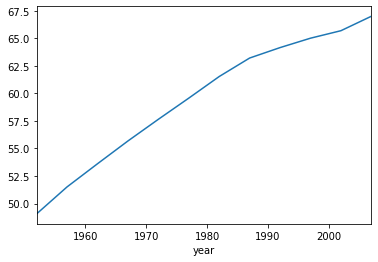

In [0]:
% matplotlib inline
import matplotlib.pyplot as plt
# 그래프 그리기
x = df.groupby('year')['lifeExp'].mean()
print(x)
x.plot()

#  3.판다스 데이터프레임과 시리즈

In [0]:
# 시리즈 만들기
s = pd.Series(['banana',42])

print(s)

# 시리즈 생성시 문자열로 만들어줄 수 있음

x = pd.Series(['Wes','Micky'],index = ['Person','Who'])

print(x)

0    banana
1        42
dtype: object
Person      Wes
Who       Micky
dtype: object


In [0]:
# 데이터 프레임 만들기

scientists = pd.DataFrame(
    
    data = {'Occupation': ['Chemist','Statistician'],
            'Born':['1920-07-25','1876-06-13'],
            'Died':['1958-04-16','1937-10-16'],
            'Age':[37,61]},
    # index = ['rosa','william]
    # columns = ['Occupation', 'Age', 'Born']  # Born, age 가 아닌 age born 순으로 바뀜.
) 

print(scientists)

#순서를 보장시키려면 딕셔너리를 OrderedDict 를 사용하기 

     Occupation        Born        Died  Age
0       Chemist  1920-07-25  1958-04-16   37
1  Statistician  1876-06-13  1937-10-16   61


- 판다스에서 데이터를 구성하는 가장 기본 단위를 시리즈라 한다.


In [0]:
# 데이터 프레임에서 시리즈를 선택하는 경우
# 해당 인덱스를 써주면된다.
first_row = scientists.loc[0]

print(first_row)

Occupation       Chemist
Born          1920-07-25
Died          1958-04-16
Age                   37
Name: 0, dtype: object


In [0]:
# 시리즈 속성과 메서드 사용하기

print(first_row.index)
# key 는 index와 같은 값을 뱉음. key는 메서드
# print(first_row.keys())

# 다음과 같이 원하는 값을 추출이 가능

#print(first_row.index[0])
# print(first_row.keys()[0])


print(first_row.values)

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')
['Chemist' '1920-07-25' '1958-04-16' 37]


In [0]:
#시리즈의 기초 통계 메서드 사용
ages = scientists['Age']

print(ages.mean())

print(ages.min())

print(ages.max())

print(ages.std())

#메서드 정리

# append : 2개 이상의 시리즈 연결
# describe : 요약 통계량 계산
# drop_duplicates : 중복값이 없는 시리즈 반환
# equals : 시리즈에 해당 값을 가진 요소가 있는지 확인
# get_values : 시리즈 값 구하기
# isin : 시리즈에 포함된 값이 있는지 확인
# min : 최솟값 반환
# max : 최댓값 반환
# mean : 산술 평균 반환
# median : 중간값 반환
# replace : 특정 값을 가진 시리즈 값을 교체
# sample : 시리즈에서 임의의 값 반환
# sort_values : 값을 정렬
# to_frame : 시리즈를 데이터프레임으로 변환


49.0
37
61
16.97056274847714


In [0]:
#비교하여 추출하기

print(ages[ages > ages.mean()])

1    61
Name: Age, dtype: int64


- 시리즈는 벡터의 한 종류

In [0]:
# 이런 식으로 연산 또한 가능
# 길이가 서로 다를시 Nan이라는 누락값으로 처리

#print(ages + 100)
#print(ages * 10)
#print(ages * ages)

In [0]:
#인덱스 역순 데이터 정렬이 아님
print(ages)
# 내림차순
rev_ages = ages.sort_index(ascending = False, inplace=True)

# 오름차순
# rev_ages = ages.sort_index(ascending=True)

# 데이터 역순
# 내림차순
rev_data_ages = ages.sort_values(ascending = False)

# 오름차순
# rev_data_ages = ages.sort_values(ascending=True)


print(rev_ages)
print(ages)


0    37
1    61
Name: Age, dtype: int64
None
1    61
0    37
Name: Age, dtype: int64


In [0]:
# 날짜 문자열은 시간 관련 작업을 할 수 있도록 datetime 자료형을 사용하는 것이 좋음.

born_datetime = pd.to_datetime(scientists['Born'], format = '%Y-%m-%d')

died_datetime = pd.to_datetime(scientists['Died'], format = '%Y-%m-%d')

print(born_datetime)

print(died_datetime)

# 새로운 열로 추가시키기

scientists['born_dt'], scientists['died_dt'] = (born_datetime,died_datetime)
print(scientists.head())

0   1920-07-25
1   1876-06-13
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
Name: Died, dtype: datetime64[ns]
     Occupation        Born        Died  Age    born_dt    died_dt
0       Chemist  1920-07-25  1958-04-16   61 1920-07-25 1958-04-16
1  Statistician  1876-06-13  1937-10-16   37 1876-06-13 1937-10-16


In [0]:
scientists['age_days_dt'] = (scientists['died_dt']- scientists['born_dt'])
print(scientists['age_days_dt'])

0   13779 days
1   22404 days
Name: age_days_dt, dtype: timedelta64[ns]


In [0]:
# 데이터 무작위로 섞어주기

import random

random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age'])

0    37
1    61
Name: Age, dtype: int64


/usr/lib/python3.6/random.py:277: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [0]:
# 데이터 열 삭제

print(scientists.columns)

scientists_droped = scientists.drop(['Age'], axis = 1)
print(scientists_droped)

Index(['Occupation', 'Born', 'Died', 'Age', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
     Occupation        Born        Died    born_dt    died_dt age_days_dt
0       Chemist  1920-07-25  1958-04-16 1920-07-25 1958-04-16  13779 days
1  Statistician  1876-06-13  1937-10-16 1876-06-13 1937-10-16  22404 days


In [0]:
# 데이터 피클로 저장하기 
# 계속 불러올 때 편리함

Occupation = scientists['Occupation']
Occupation.to_pickle('/content/scientists_op_series.pickle')

scientists.to_pickle('/content/scientists_df.pickle')

In [0]:
#데이터 피클에서 불러오기

scientist_op_from_pickle = pd.read_pickle('/content/scientists_op_series.pickle')
print(scientist_op_from_pickle)
scientist_from_pickle = pd.read_pickle('/content/scientists_df.pickle')
print(scientist_from_pickle)

0         Chemist
1    Statistician
Name: Occupation, dtype: object
     Occupation        Born        Died  Age    born_dt    died_dt age_days_dt
0       Chemist  1920-07-25  1958-04-16   37 1920-07-25 1958-04-16  13779 days
1  Statistician  1876-06-13  1937-10-16   61 1876-06-13 1937-10-16  22404 days


In [0]:
Occupation.to_csv('/content/scientists_op_series.csv')
scientists.to_csv('/content/scientists_df.tsv', sep='\t')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


- 시리즈는 엑셀 파일(.xls)로 저장이 불가하다.
- 시리즈는 to_frame 메서드를 통하여 데이터프레임으로 변환시키고 엑셀 파일로 저장한다.

In [0]:
import xlwt
import openpyxl

In [0]:
# occupation_df = Occupation.to_frame()

# occupation_df.to_excel('/content/scientists_op_series_df,xls')

# occupation_df.to_excel('/content/scientists_op_series_df,xlsx')

#  4.그래프 그리기

In [0]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [0]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']

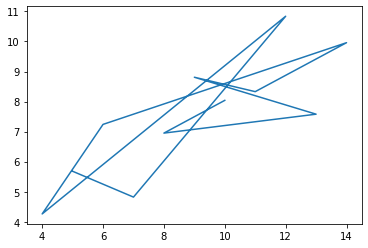

In [0]:
plt.plot(dataset_1['x'], dataset_1['y'])

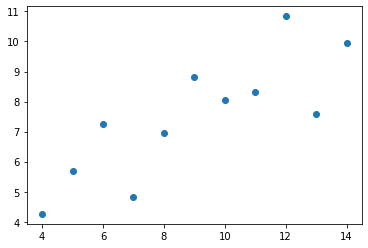

In [0]:
plt.plot(dataset_1['x'], dataset_1['y'],'o')

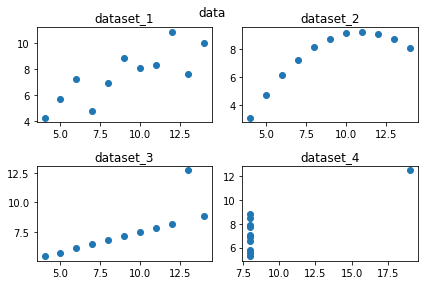

In [0]:
# 그래프 한번에 4개 그리기

dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

#기본 틀 생성
fig = plt.figure()
#액자에 (행,열,위치) 생성
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

#액자안의 각 틀에 그리기

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')


#제목을 추가하기
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

#전체 액자에 이름붙이기

fig.suptitle("data")

#가운데 숫자와 제목이 겹치는 현상 방지

fig.tight_layout()

### 기초그래프 그리기

- 히스토그램 : 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 사용, 변수를 하나만 사용하기 때문에, 일변량 그래프라고도 한다.

In [0]:
# 기초그래프 그리기

tips = sns.load_dataset("tips")

print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total_bill')

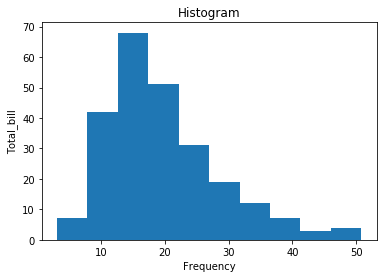

In [0]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.hist(tips['total_bill'], bins = 10)

axes1.set_title('Histogram')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total_bill')


- 산점도 그래프 : 변수 2개를 사용해서 만드는 그래프로 이변량 그래프로 흔히 말한다.

Text(0, 0.5, 'tip')

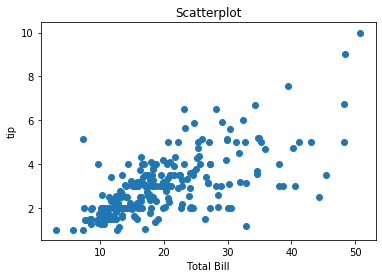

In [0]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('tip')

- 박스 그래프 : 이산형 변수(0,1 혹은 남자,여자) 와 연속형 변수를 함계 사용하는 그래프입니다. 이산형 변수란 Female, Male과 같이 명확하게 구분되는 값을 의미하고, 연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미합니다.

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

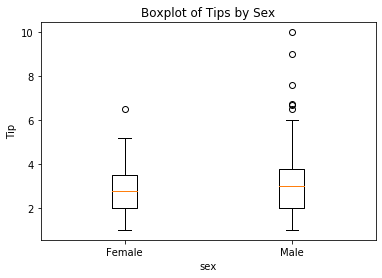

In [0]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex']=='Female']['tip'],
               tips[tips['sex']=='Male']['tip']],
              labels=['Female','Male'])

axes1.set_xlabel('sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

- 다변량 그래프 : 변수가 3개 이상인 그래프

In [0]:
# 문자열을 0,1 로 표현시켜야함

def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

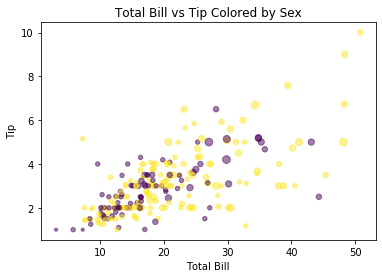

In [0]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha = 0.5
)
# s는 점의 크기, c는 점의 색상
axes1.set_title('Total Bill vs Tip Colored by Sex')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

In [0]:
tips = tips.drop(['sex_color'],axis=1)

In [0]:
# 위의 것을 lamda식으로 변경

tips['sex_color'] = tips.apply(lambda x: recode_sex(x['sex']),axis=1)

Text(0, 0.5, 'Tip')

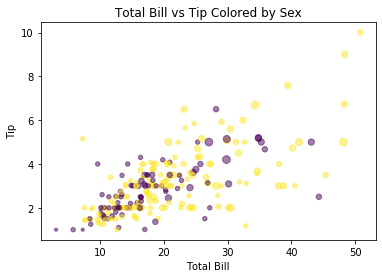

In [0]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha = 0.5
)
# s는 점의 크기, c는 점의 색상
axes1.set_title('Total Bill vs Tip Colored by Sex')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## sns 이용하기!!

Text(0.5, 1.0, 'total bill histogram with density plot')

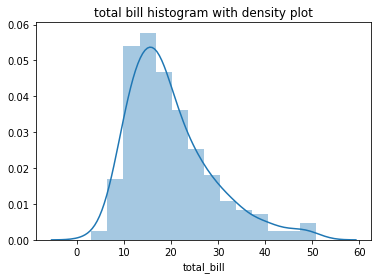

In [0]:
import seaborn as sns

tips = sns.load_dataset("tips")
#  sns는 plt.figure() 가 필요없음.

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('total bill histogram with density plot')

Text(0, 0.5, 'Frequency')

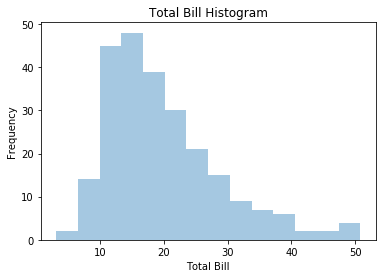

In [0]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'],kde=False)

ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Unit Probability')

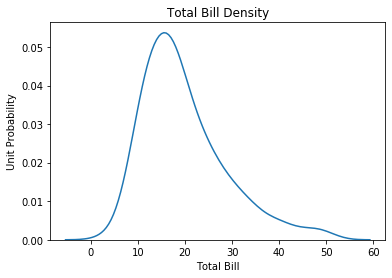

In [0]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

Text(0.5, 1.0, 'Total BD with rug')

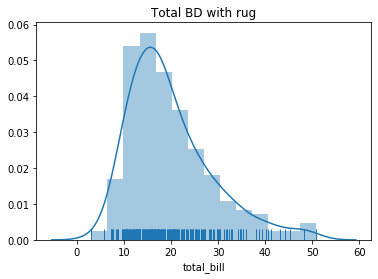

In [0]:
#양탄자 그래프 : 데이터의 밀집 정도를 표현한 그래프

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total BD with rug')

Text(0, 0.5, 'Fre')

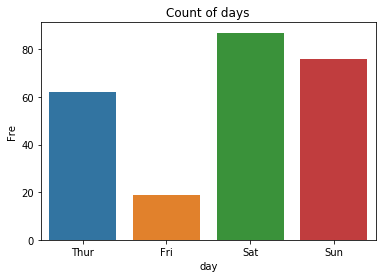

In [0]:
# 이산형 변수의 일부의 빈도수 체크

ax = plt.subplots()
ax = sns.countplot('day',data=tips)
ax.set_title('Count of days')
ax.set_xlabel('day')
ax.set_ylabel('Fre')

Text(0, 0.5, 'Tip')

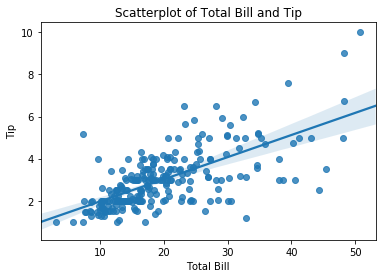

In [0]:
# sns 산점도 그래프 그리기

ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data = tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

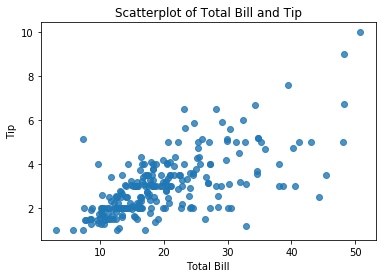

In [0]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data = tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot bill and tip')

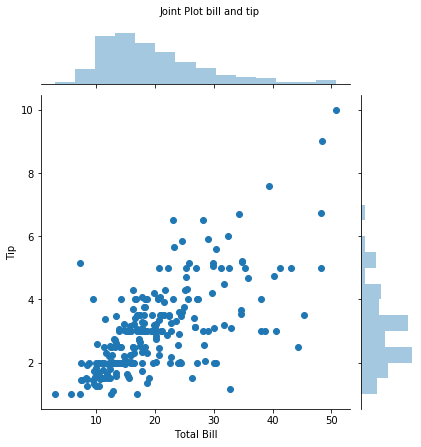

In [0]:
#산점도와 히스토그램 한번에

joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel = 'Tip')
joint.fig.suptitle('Joint Plot bill and tip', fontsize = 10, y = 1.03)

Text(0.5, 1.03, 'Joint Plot bill and tip')

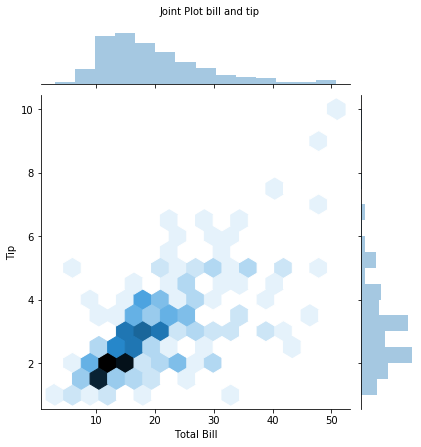

In [0]:
# 점이 겹쳐보이는 방지 > 육각으로 나타낼 수도 있다.

hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind="hex")
hexbin.set_axis_labels(xlabel='Total Bill', ylabel = 'Tip')
hexbin.fig.suptitle('Joint Plot bill and tip', fontsize = 10, y = 1.03)

Text(0, 0.5, 'Tip')

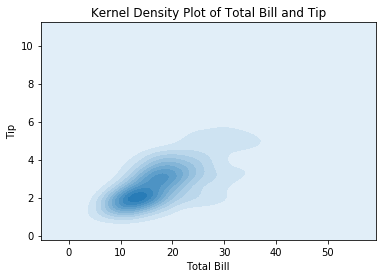

In [0]:
# 음영도 그리기
ax = plt.subplots()
ax = sns.kdeplot(data = tips['total_bill'],
                 data2 = tips['tip'],
                 shade = True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'average total bill')

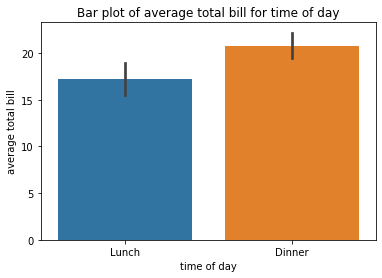

In [0]:
# 바 그래프 그리기
# 지정한 변수의 평균

ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('time of day')
ax.set_ylabel('average total bill')

Text(0, 0.5, 'Total of bill')

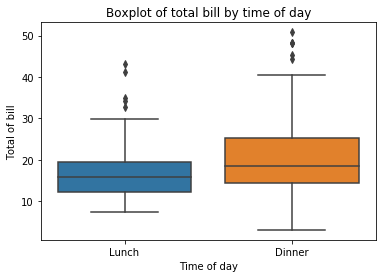

In [0]:
#박스 그래프 그리기
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total of bill')

Text(0, 0.5, 'Total of bill')

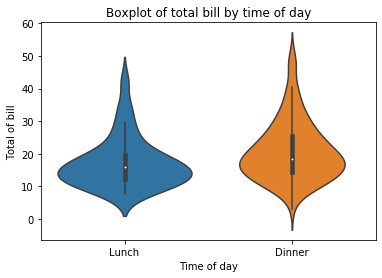

In [0]:
# 박스 + 데이터 분산의 표현 (바이올린 그래프)
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total of bill')

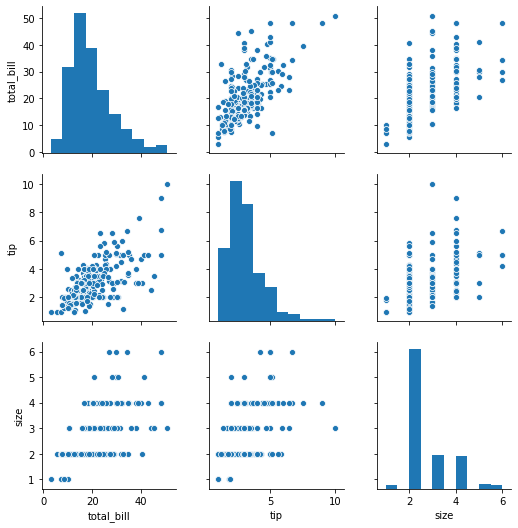

In [0]:
# 관계 그래프 그리기
# 대각선을 기준으로 오른쪽위 왼쪽아래가 겹치는 현상이 발생 중복이 발생하는 부분을 수동으로 바꿔주면된다.
fig = sns.pairplot(tips)

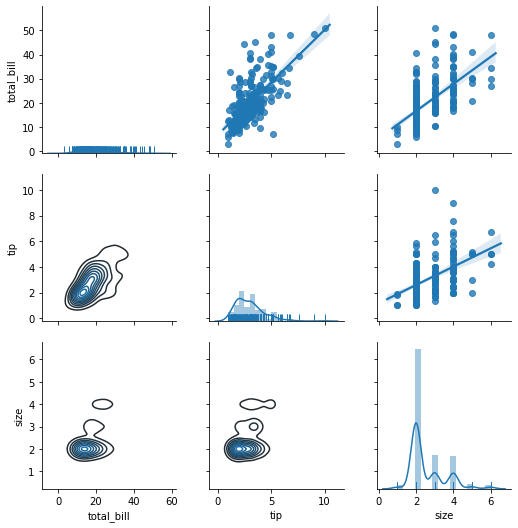

In [0]:
fig = sns.PairGrid(tips)
fig = fig.map_upper(sns.regplot)
fig = fig.map_lower(sns.kdeplot)
fig = fig.map_diag(sns.distplot, rug=True)
plt.show()

- sns 로 다변량 그래프 표현

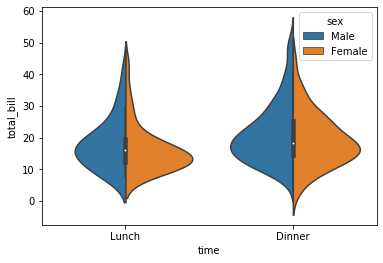

In [0]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y = 'total_bill', hue='sex', data =tips, split=True)

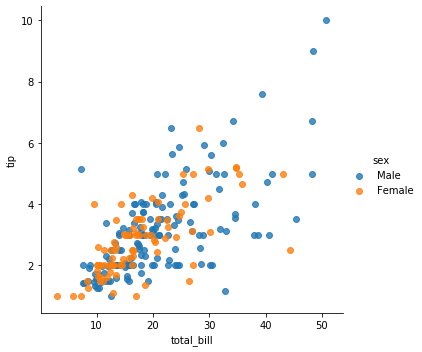

In [0]:
scatter = sns.lmplot(x='total_bill',y ='tip', data=tips, hue='sex', fit_reg=False)

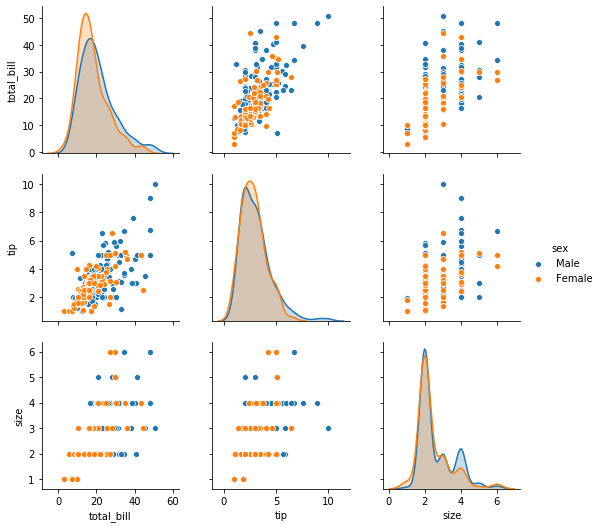

In [0]:
fig = sns.pairplot(tips, hue='sex')

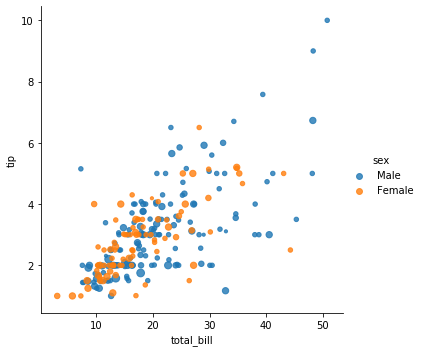

In [0]:
# 산점도 그래프의 크기와 모양 조절하기

scatter = sns.lmplot(x='total_bill', y = 'tip', data=tips, fit_reg=False, hue='sex', scatter_kws={'s': tips['size']*10})

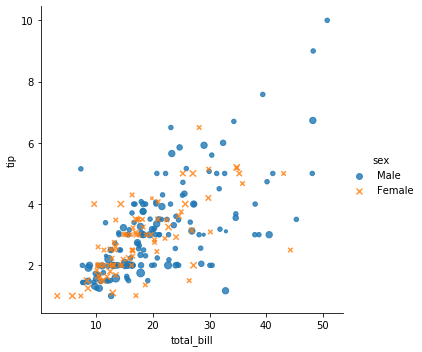

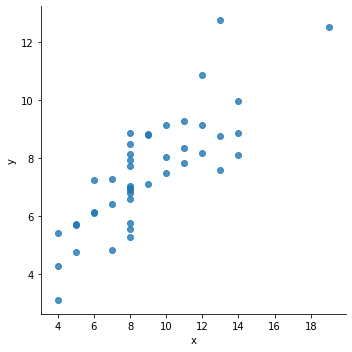

In [0]:
#다른 기호로 표현하기

scatter = sns.lmplot(x='total_bill', y = 'tip', data=tips, fit_reg=False, hue='sex',markers=['o','x'], scatter_kws={'s': tips['size']*10})
# fit_reg는 회귀선의 유무를 지정하는 값

anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False)

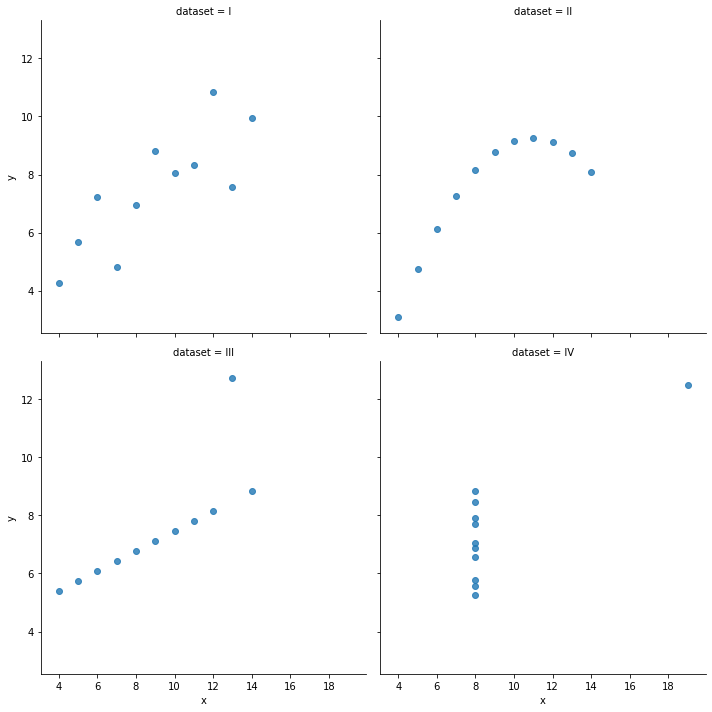

In [0]:
# col, col_wrap 추가
anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False,
                           col='dataset',col_wrap=2)
# col 기준, col_wrap 열 공간

- FacetGrid  클래스로도 그룹별 그래프를 그릴 수 있다.

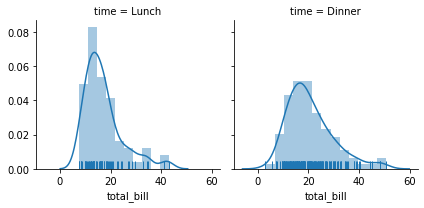

In [0]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

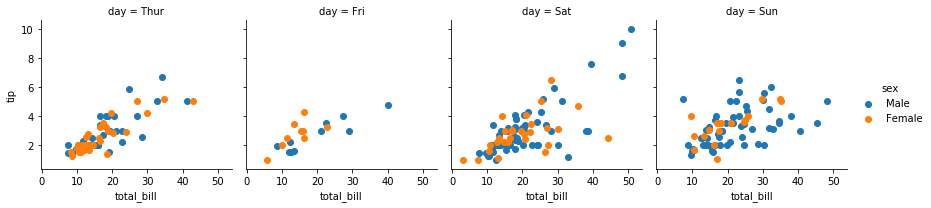

In [0]:
#다변량

facet = sns.FacetGrid(tips, col='day',hue='sex')
facet = facet.map(plt.scatter, 'total_bill','tip')
facet = facet.add_legend()

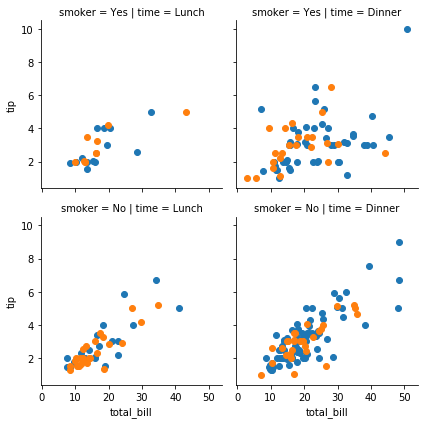

In [0]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

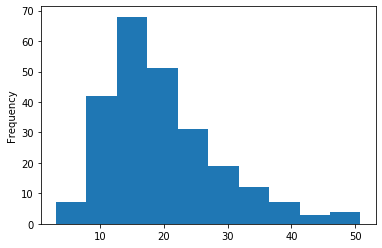

In [0]:
#데이터프레임과 시리즈로 그래프 그리기

ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

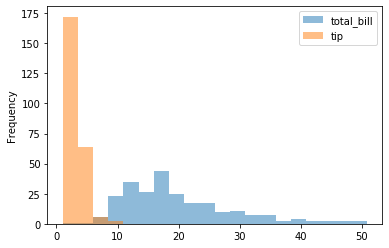

In [0]:
fig, ax = plt.subplots()
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

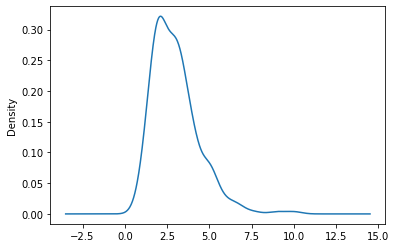

In [0]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

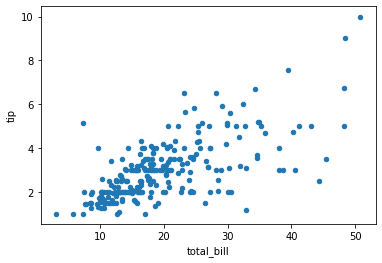

In [0]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y = 'tip', ax=ax)

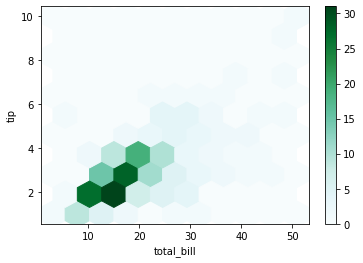

In [0]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip',gridsize=10, ax=ax)

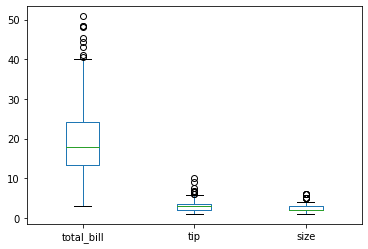

In [0]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

- style 은 sns.set_style('whilegrid')
- set_style 옵션 : 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

# 5.데이터 연결하기 (중요)

In [0]:
import pandas as pd

concat_1 = pd.DataFrame(
    data = {'A':['a0','a1'],
            'B':['b0','b1'],
            'C':['c0','c1'],
            'D':['d0','d1']}
)

concat_2 = pd.DataFrame(
    data = {'A':['a2','a3','a4','a5'],
            'B':['b2','b3','b4','b5'],
            'C':['c2','c3','c4','c5'],
            'D':['d2','d3','d4','d5']}
)

concat_3 = pd.DataFrame(
    data = {'A':['a6','a7','a8','a9','a10'],
            'B':['b6','b7','b8','b9','b10'],
            'C':['c6','c7','c8','c9','c10'],
            'D':['d6','d7','d8','d9','d10']}
)

concat_1.reset_index()
print(concat_1)

concat_1.to_csv('/content/concat_1.csv')
concat_2.to_csv('/content/concat_2.csv')
concat_3.to_csv('/content/concat_3.csv')

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1


In [0]:
# concat 메서드를 이용하여 데이터 연결하기

df1 = pd.read_csv('/content/concat_1.csv')
df2 = pd.read_csv('/content/concat_2.csv')
df3 = pd.read_csv('/content/concat_3.csv')
row_concat = pd.concat([df1,df2,df3])
#row_concat = row_concat.drop(['Unnamed: 0'],axis=1)
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


In [0]:
print(row_concat.iloc[3,])

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object


In [0]:
# 시리즈 연결하기
new_row_series = pd.Series(['n1','n2','n3','n4'])

print(pd.concat([df1, new_row_series]))

# 시리즈는 열이 없어서 새로운 열로 간주하여 0이라는 이름의 열로 추가됨.

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


In [0]:
# 시리즈를 데이터프레임으로 바꿔서 연결해야함.

new_row_df = pd.DataFrame([['n1','n2','n3','n4']],columns=['A','B','C','D'])

print(pd.concat([row_concat,new_row_df]))

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11
0   n1   n2   n3   n4


In [0]:
# append 메서드와 딕셔너리를 사용하며 행을 더 간편하게 연결이가능

data_dict = {'A':'n1','B':'n2','C':'n3','D':'n4'}

print(row_concat.append(data_dict, ignore_index=True))

#ignore_index 옵션으로 다시 인덱스를 설정


      A    B    C    D
0    a0   b0   c0   d0
1    a1   b1   c1   d1
2    a2   b2   c2   d2
3    a3   b3   c3   d3
4    a4   b4   c4   d4
5    a5   b5   c5   d5
6    a6   b6   c6   d6
7    a7   b7   c7   d7
8    a8   b8   c8   d8
9    a9   b9   c9   d9
10  a10  b10  c10  d10
11  a11  b11  c11  d11
12   n1   n2   n3   n4


In [0]:
# 열 방향으로 데이터 연결하기

col_concat = pd.concat([df1,df2,df3], axis = 1)

print(col_concat.head())

    A   B   C   D   A   B   C   D    A    B    C    D
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [0]:
# 추가

col_concat['new_col'] = ['n1','n2','n3','n4']

print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D new_col
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8      n1
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9      n2
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10      n3
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11      n4


In [0]:
#인덱스 재조정
print(pd.concat([df1,df2,df3], axis=1, ignore_index = True))

    0   1   2   3   4   5   6   7    8    9   10   11
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [0]:
# 공통 인덱스만 연결하기

df1.columns = ['a','b','c','d']
df2.columns = ['e','f','g','h']
df3.columns = ['a','c','f','h']

row_concat = pd.concat([df1,df2,df3])
print(row_concat)

# 맞지 않는 열의 데이터에서 누락값들이 발생

     a    b    c    d    e    f    g    h
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a8  NaN   b8  NaN  NaN   c8  NaN   d8
1   a9  NaN   b9  NaN  NaN   c9  NaN   d9
2  a10  NaN  b10  NaN  NaN  c10  NaN  d10
3  a11  NaN  b11  NaN  NaN  c11  NaN  d11


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [0]:
# 같은 열이 없어서 합쳐지지 않음.
print(pd.concat([df1,df2,df3],join = 'inner'))

# df1, df3의 경우 a,c 열이 겹치기 때문에 concat으로 행으로 합쳐진다.
print(pd.concat([df1,df3], ignore_index = False, join='inner'))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]
     a    c
0   a0   c0
1   a1   c1
2   a2   c2
3   a3   c3
0   a8   b8
1   a9   b9
2  a10  b10
3  a11  b11


In [0]:
# 이는 행 방향으로도 가능하다.
df1.index = [0,1,2,3]
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]

print(pd.concat([df1,df3],axis = 1, join='inner'))

    a   b   c   d   a   c   f   h
0  a0  b0  c0  d0  a8  b8  c8  d8
2  a2  b2  c2  d2  a9  b9  c9  d9


## merge 메서드  
- 기본적으로 위의 join인 inner로 내부조인을 실행하며, 메서드를 사용한 데이터프레임을 왼쪽으로 지정하고 첫번째 인자값으로 지정한 데이터 프레임을 오른쪽으로 지정한다.
- left_on, right-on 인자는 값이 일치해야 할 왼족과 오른쪽 데이터프레임의 열을 지정한다. 즉, 왼쪽 데이터프레임의 열과 오른족 데이터프레임의 열의 값이 일치하면 왼쪽 데이터프레임을 기준으로 연결한다.

- merge에 대한 이해
[https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/](https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/)

In [0]:
person = pd.read_csv('/content/survey_person.csv')
site = pd.read_csv('/content/survey_site.csv')
survey = pd.read_csv('/content/survey_survey.csv')
visited = pd.read_csv('/content/survey_visited.csv')

In [0]:
print(person)

print(survey)
print(visited)

      ident   personal    family
0      dyer    William      Dyer
1        pb      Frank   Pabodie
2      lake   Anderson      Lake
3       roe  Valentina   Roerich
4  danforth      Frank  Danforth
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
    taken person quant  reading
0     619   dyer   rad     9.82
1     619   dyer   sal     0.13
2     622   dyer   rad     7.80
3     622   dyer   sal     0.09
4     734     pb   rad     8.41
5     734   lake   sal     0.05
6     734     pb  temp   -21.50
7     735     pb   rad     7.22
8     735    NaN   sal     0.06
9     735    NaN  temp   -26.00
10    751     pb   rad     4.35
11    751     pb  temp   -18.50
12    751   lake   sal     0.10
13    752   lake   rad     2.19
14    752   lake   sal     0.09
15    752   lake  temp   -16.00
16    752    roe   sal    41.60
17    837   lake   rad     1.46
18    837   lake   sal     0.21
19    837    roe   sal    22.50
20    844    roe   rad    11.25
  

In [0]:
visited_subset = visited.loc[[0,2,6],]
print(visited_subset)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14


In [0]:
print(site)

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40


In [0]:
o2o_merge = site.merge(visited_subset, left_on='name', right_on = 'site')
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [0]:
ps = person.merge(survey, left_on = 'ident', right_on='person')
print(ps)

   ident   personal   family  taken person quant  reading
0   dyer    William     Dyer    619   dyer   rad     9.82
1   dyer    William     Dyer    619   dyer   sal     0.13
2   dyer    William     Dyer    622   dyer   rad     7.80
3   dyer    William     Dyer    622   dyer   sal     0.09
4     pb      Frank  Pabodie    734     pb   rad     8.41
5     pb      Frank  Pabodie    734     pb  temp   -21.50
6     pb      Frank  Pabodie    735     pb   rad     7.22
7     pb      Frank  Pabodie    751     pb   rad     4.35
8     pb      Frank  Pabodie    751     pb  temp   -18.50
9   lake   Anderson     Lake    734   lake   sal     0.05
10  lake   Anderson     Lake    751   lake   sal     0.10
11  lake   Anderson     Lake    752   lake   rad     2.19
12  lake   Anderson     Lake    752   lake   sal     0.09
13  lake   Anderson     Lake    752   lake  temp   -16.00
14  lake   Anderson     Lake    837   lake   rad     1.46
15  lake   Anderson     Lake    837   lake   sal     0.21
16   roe  Vale

In [0]:
vs = visited.merge(survey, left_on = 'ident', right_on = 'taken')
print(vs)

    ident   site       dated  taken person quant  reading
0     619   DR-1  1927-02-08    619   dyer   rad     9.82
1     619   DR-1  1927-02-08    619   dyer   sal     0.13
2     622   DR-1  1927-02-10    622   dyer   rad     7.80
3     622   DR-1  1927-02-10    622   dyer   sal     0.09
4     734   DR-3  1939-01-07    734     pb   rad     8.41
5     734   DR-3  1939-01-07    734   lake   sal     0.05
6     734   DR-3  1939-01-07    734     pb  temp   -21.50
7     735   DR-3  1930-01-12    735     pb   rad     7.22
8     735   DR-3  1930-01-12    735    NaN   sal     0.06
9     735   DR-3  1930-01-12    735    NaN  temp   -26.00
10    751   DR-3  1930-02-26    751     pb   rad     4.35
11    751   DR-3  1930-02-26    751     pb  temp   -18.50
12    751   DR-3  1930-02-26    751   lake   sal     0.10
13    752   DR-3         NaN    752   lake   rad     2.19
14    752   DR-3         NaN    752   lake   sal     0.09
15    752   DR-3         NaN    752   lake  temp   -16.00
16    752   DR

In [0]:
# merge에 대한 이해
df1 = pd.DataFrame({
    '이름': ['영희', '철수A', '철수B'],
    '성적': [1, 2, 3]})
df1

df2 = pd.DataFrame({
    '이름': ['영희', '영희', '철수C'],
    '성적2': [4, 5, 6]})
df2


,이름,성적2
0,영희,4
1,영희,5
2,철수C,6


In [0]:
# 기본값 : 키를 기준으로 merge 위의 이름에 대한 키로 merge됨.
pd.merge(df1,df2)

,이름,성적,성적2
0,영희,1,4
1,영희,1,5


In [0]:
# 같은 키에 해당하는 값에 기준을 하면 안되는 경우
# 데이터에 해당하는 값이 다른 데이터 이므로 merge가 되지 않음
# on 의 옵션을 통해 기준열을 강제 지정

df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2
# 같은 데이터는 _x, _y 로 표현됨.
pd.merge(df1, df2, on='고객명')

,고객명,날짜,데이터_x,데이터_y
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


In [0]:
#데이터열의 값이 서로 다른 값이므로 merge가 안됨.
pd.merge(df1, df2)

,고객명,날짜,데이터


In [0]:
# 반대로 키가 되는 기준열의 이름이 두 데이터프레임에서 다르다면 left_on, right_on을 통해 기준열을 명시해야 한다.

df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2

# 중복성이 있는 부분에서 '이름' , '성명' 의 데이터가 다름

pd.merge(df1,df2,left_on='이름',right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [0]:
#다음의 열데이터와 서로다른 행데이터를 merge 시킬 수 있다. left_index와 right_index를 통해서
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1


,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [0]:
import numpy as np
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [0]:
# df1의 도시와 연도를 기준열로하여, df2의 인덱스 '부산' '서울'를 기준열로 사용하여 merge한다.
pd.merge(df1,df2,left_on=['도시','연도'],right_index=True)

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


# 6.누락값 확인하기

- 0 과는 다른 개념 (Nan, NAN, nan != 0)
- 누락값이 있는 데이터의 집합을 연결할 때
- 값 자체의 누락값을 만드는 경우 (입력)
- 범위 지정 추출할 때 누락값이 생기는 경우 ( 이 경우는 bool의 결과로 통해 방지가 가능)


In [0]:
ebola = pd.read_csv('/content/country_timeseries.csv')

In [0]:
# nan이 아닌 값의 개수
print(ebola.count())
# 누락값 개수 구하기

num_rows = ebola.shape[0]
num_missing =  num_rows - ebola.count()
print(num_missing)

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64
Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


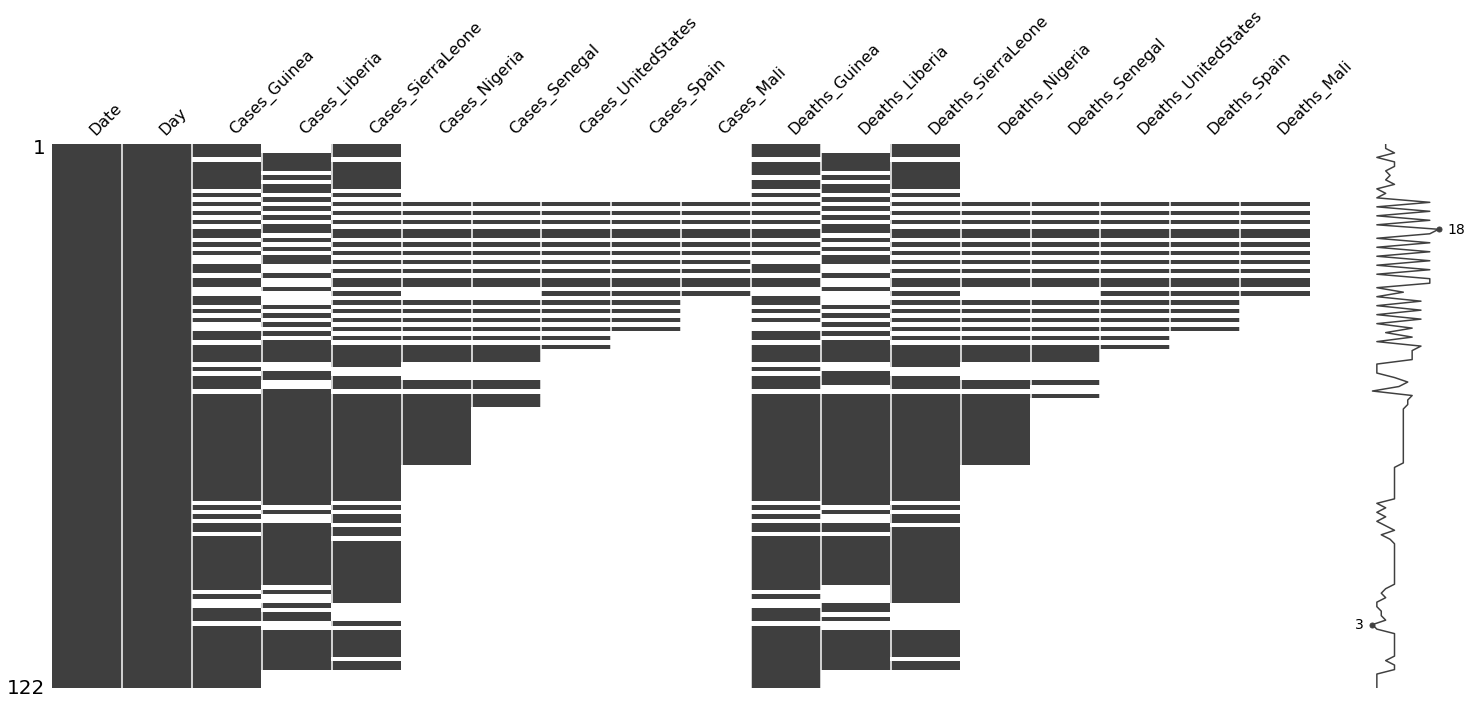

In [0]:
# +누락값을 볼 수 있는 라이브러리 
# 흰색이 많을 수록 누락이 많음.
import missingno as msno
%matplotlib inline
msno.matrix(ebola)

In [0]:
#이러한 누락값은 의미가 있는 경우가 있고 없는 경우가 있어 상황에 따라 채워주거나 삭제해야한다.

#누락값 변경하기

print(ebola.fillna(0).iloc[0:10, 0:5]) # 10행 5열까지의 누락값을 0으로 채운다.
print(ebola.fillna(method='ffill').iloc[0:10, 0:5]) # 10행 5열까지의 누락값을 앞의 값으로 채운다.
print(ebola.fillna(method='bfill').iloc[0:10, 0:5]) # 10행 5열까지의 누락값을 뒷의 값으로 채운다.
print(ebola.interpolate().iloc[0:10,0:5]) # 10행 5열까지의 누락값을 앞 뒤의 중간값으로 채운다.

#누락열 삭제
# 데이터프레임.drop=데이터프레임['열'] 의미없는 열을 삭제한다.
# 데이터프레임.dropna() 를 통해 누락값이 있는 행을 삭제시킨다.

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            0.0            10030.0
1    1/4/2015  288        2775.0            0.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           0.0         8157.0                0.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            0.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            0.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [0]:
# 누락값을 빼고 계산을 시킬 때,

ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_SierraLeone']

ebola_subset = ebola.loc[:,['Cases_Guinea','Cases_SierraLeone','Cases_multiple']]

print(ebola.Cases_Guinea.sum(skipna = True))
# skipna false 로 할시 누락값이 포함되어 누락값으로 됨
#print(ebola.Cases_Guinea.sum(skipna = False))

84729.0


# 7.깔끔한 데이터

## 열이 너무 긴 경우
- melt : 열이 너무 길 경우 행으로 바꿔줄 수 있는 메서드

인자 : 

id_vars : 위치를 그대로 유지할 열의 이름을 지정  
value_vars : 행으로 위치를 변경할 열의 이름을 지정  
var_name : value_vars로 위치를 변경한 열의 이름을 지정  
value_name : var_name으로 위치를 변경한 열의 데이터를 저장한 열의 이름을 지정

In [0]:
# 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

pew = pd.read_csv('/content/pew.csv')

print(pew.head())

             religion  <$10k  $10-20k  ...  $100-150k  >150k  Don't know/refused
0            Agnostic     27       34  ...        109     84                  96
1             Atheist     12       27  ...         59     74                  76
2            Buddhist     27       21  ...         39     53                  54
3            Catholic    418      617  ...        792    633                1489
4  Don’t know/refused     15       14  ...         17     18                 116

[5 rows x 11 columns]


In [0]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
print(pew_long.head())

# religion 열을 고정하여 피벗했다라고 한다.

             religion income  count
0            Agnostic  <$10k     27
1             Atheist  <$10k     12
2            Buddhist  <$10k     27
3            Catholic  <$10k    418
4  Don’t know/refused  <$10k     15


In [0]:
# 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

billboard = pd.read_csv('/content/billboard.csv')

print(billboard)

     year            artist                    track  ... wk74 wk75  wk76
0    2000             2 Pac  Baby Don't Cry (Keep...  ...  NaN  NaN   NaN
1    2000           2Ge+her  The Hardest Part Of ...  ...  NaN  NaN   NaN
2    2000      3 Doors Down               Kryptonite  ...  NaN  NaN   NaN
3    2000      3 Doors Down                    Loser  ...  NaN  NaN   NaN
4    2000          504 Boyz            Wobble Wobble  ...  NaN  NaN   NaN
..    ...               ...                      ...  ...  ...  ...   ...
312  2000       Yankee Grey     Another Nine Minutes  ...  NaN  NaN   NaN
313  2000  Yearwood, Trisha          Real Live Woman  ...  NaN  NaN   NaN
314  2000   Ying Yang Twins  Whistle While You Tw...  ...  NaN  NaN   NaN
315  2000     Zombie Nation            Kernkraft 400  ...  NaN  NaN   NaN
316  2000   matchbox twenty                     Bent  ...  NaN  NaN   NaN

[317 rows x 81 columns]


In [0]:
billboard_long = pd.melt(billboard, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rating')
print(billboard_long.head())

   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


## 열이름 관리하기

- 하나의 열이 여러 의미를 가지고 있는 경우

In [0]:
ebola = pd.read_csv('/content/country_timeseries.csv')

print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [0]:
print(ebola.iloc[:5, [0,1,2,3,10,11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [0]:
ebola_long = pd.melt(ebola, id_vars = ['Date','Day'])
print(ebola_long.head())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


In [0]:
variable_split = ebola_long.variable.str.split('_')
print(variable_split[:5])

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [0]:
# 상태 : cases, death 나라: 나라이름 으로 분리
status = variable_split.str.get(0)
country_name = variable_split.str.get(1) 

In [0]:
ebola_long['status'] = status
ebola_long['country'] = country_name
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


In [0]:
# 다음 위 과정을 concat을 이용하여 한번에 가능

variable_split = ebola_long.variable.str.split('_',expand=True)
variable_split.columns = ['status','country']

ebola_parsed = pd.concat([ebola_long, variable_split],axis=1)

print(ebola_parsed.head())

         Date  Day      variable   value status country status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea  Cases  Guinea


In [0]:
weather = pd.read_csv('/content/weather.csv')
print(weather.iloc[:5,:])

        id  year  month element  d1    d2  ...  d26  d27  d28  d29   d30  d31
0  MX17004  2010      1    tmax NaN   NaN  ...  NaN  NaN  NaN  NaN  27.8  NaN
1  MX17004  2010      1    tmin NaN   NaN  ...  NaN  NaN  NaN  NaN  14.5  NaN
2  MX17004  2010      2    tmax NaN  27.3  ...  NaN  NaN  NaN  NaN   NaN  NaN
3  MX17004  2010      2    tmin NaN  14.4  ...  NaN  NaN  NaN  NaN   NaN  NaN
4  MX17004  2010      3    tmax NaN   NaN  ...  NaN  NaN  NaN  NaN   NaN  NaN

[5 rows x 35 columns]


In [0]:
weather_long = weather.melt(id_vars=['id','year','month','element'],var_name='day',value_name='temp')

print(weather_long)

          id  year  month element  day  temp
0    MX17004  2010      1    tmax   d1   NaN
1    MX17004  2010      1    tmin   d1   NaN
2    MX17004  2010      2    tmax   d1   NaN
3    MX17004  2010      2    tmin   d1   NaN
4    MX17004  2010      3    tmax   d1   NaN
..       ...   ...    ...     ...  ...   ...
677  MX17004  2010     10    tmin  d31   NaN
678  MX17004  2010     11    tmax  d31   NaN
679  MX17004  2010     11    tmin  d31   NaN
680  MX17004  2010     12    tmax  d31   NaN
681  MX17004  2010     12    tmin  d31   NaN

[682 rows x 6 columns]


## pivot_table

- syntax: pivot_table(values, index, columns, aggfunc='mean', fill_value=None, dropna=True, margins=False, margins_name='All')  
  - pivot 메서드와 달리 values 파라미터가 먼저 들어간다는 점에 유의!
  - aggfunc: index와 columns로 선택되는 데이터가 유일하지 않으면 인수로 넣어주는 함수를 수행하여 대표값을 계산함
  - fill_value: NaN을 대체할 값
  - dropna: values가 전부 NaN인 행/열의 삭제 여부
  - margins: 모든 데이터를 분석한 결과(=마진)를 마지막 행/열에 붙일지 여부
  - margins_name: 마진 행/열의 이름

In [0]:
weather_tidy = weather_long.pivot_table(
    index=['id','year','month','day'],
    columns = 'element',
    values = 'temp',
    dropna = False
)
# columns element를 통하여 index로 변경되고, tmax tmin 열로 변경
# values값인 temp는 새로운 열의 데이터로 들어간다.
print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d1    NaN   NaN
                   d10   NaN   NaN
                   d11   NaN   NaN
                   d12   NaN   NaN
                   d13   NaN   NaN
...                      ...   ...
             12    d5    NaN   NaN
                   d6   27.8  10.5
                   d7    NaN   NaN
                   d8    NaN   NaN
                   d9    NaN   NaN

[341 rows x 2 columns]


In [0]:
weather_tidy_flat = weather_tidy.reset_index()
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1   d1   NaN   NaN
1        MX17004  2010      1  d10   NaN   NaN
2        MX17004  2010      1  d11   NaN   NaN
3        MX17004  2010      1  d12   NaN   NaN
4        MX17004  2010      1  d13   NaN   NaN


In [0]:
# 중복 데이터 처리하기

billboard = pd.read_csv('/content/billboard.csv')
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name = 'week', value_name='rating')

In [0]:
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [0]:
billboard_songs = billboard_long[['year','artist','track','time']]
billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 4)


In [0]:
billboard_songs['id'] = range(len(billboard_songs))
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [0]:
# 노래 정보와 주간 순위 데이터를 합침

billboard_ratings = billboard_long.merge(billboard_songs, on=['year','artist','track','time'])
print(billboard_ratings.shape)

print(billboard_ratings.head(n=10))

print(billboard_ratings.tail(n=10))

(24092, 8)
   year artist                    track  time date.entered  week  rating  id
0  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk1    87.0   0
1  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk2    82.0   0
2  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk3    72.0   0
3  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk4    77.0   0
4  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk5    87.0   0
5  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk6    94.0   0
6  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk7    99.0   0
7  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk8     NaN   0
8  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   wk9     NaN   0
9  2000  2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk10     NaN   0
       year           artist track  time date.entered  week  rating   id
24082  2000  matchbox twenty  Bent  4:12   2000-04-29  wk67     NaN  

In [0]:
import os
import urllib.request

with open('/content/raw_data_urls.txt','r') as data_urls:
  for line, url in enumerate(data_urls):
    if line == 5:
      break
    fn = url.split('/')[-1].strip()
    fp = os.path.join('','/content',fn)
    print(url)
    print(fp)
    urllib.request.urlretrieve(url,fp)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

/content/fhv_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv

/content/fhv_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv

/content/fhv_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv

/content/fhv_tripdata_2015-04.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv

/content/fhv_tripdata_2015-05.csv


In [0]:
import glob
nyc_taxi_data = glob.glob('/content/fhv_*')
print(nyc_taxi_data)

taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])
taxi3 = pd.read_csv(nyc_taxi_data[2])
taxi4 = pd.read_csv(nyc_taxi_data[3])
taxi5 = pd.read_csv(nyc_taxi_data[4])

['/content/fhv_tripdata_2015-05.csv', '/content/fhv_tripdata_2015-01.csv', '/content/fhv_tripdata_2015-04.csv', '/content/fhv_tripdata_2015-03.csv', '/content/fhv_tripdata_2015-02.csv']


In [0]:
taxi = pd.concat([taxi1,taxi2,taxi3,taxi4,taxi5])

print(taxi.head(n=10))

  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN
2               B00001  2015-05-01 05:05:00         NaN
3               B00001  2015-05-01 06:15:00         NaN
4               B00001  2015-05-01 06:15:00         NaN
5               B00001  2015-05-01 06:30:00         NaN
6               B00001  2015-05-01 06:30:00         NaN
7               B00001  2015-05-01 06:30:00         NaN
8               B00001  2015-05-01 06:45:00         NaN
9               B00001  2015-05-01 06:45:00         NaN


In [0]:
#위 코드를 간추림

list_taxi_df = []

for csv_filename in nyc_taxi_data:
  df = pd.read_csv(csv_filename)
  list_taxi_df.append(df)

taxi_concat = pd.concat(list_taxi_df)

print(taxi_concat.head())

  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN
2               B00001  2015-05-01 05:05:00         NaN
3               B00001  2015-05-01 06:15:00         NaN
4               B00001  2015-05-01 06:15:00         NaN


# 8.판다스 자료형

- 자료형 변환은 astype 으로
- 연속되는 같은 문자열이 있을 경우 주로 category 로 변경한다.

In [0]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset("tips")

In [0]:
tips.head()
tips_sub_miss = tips.head(10)
tips_sub_miss.loc[[1,3,5,7],'total_bill'] = 'missing'

print(tips_sub_miss)

  total_bill   tip     sex smoker  day    time  size
0      16.99  1.01  Female     No  Sun  Dinner     2
1    missing  1.66    Male     No  Sun  Dinner     3
2      21.01  3.50    Male     No  Sun  Dinner     3
3    missing  3.31    Male     No  Sun  Dinner     2
4      24.59  3.61  Female     No  Sun  Dinner     4
5    missing  4.71    Male     No  Sun  Dinner     4
6       8.77  2.00    Male     No  Sun  Dinner     2
7    missing  3.12    Male     No  Sun  Dinner     4
8      15.04  1.96    Male     No  Sun  Dinner     2
9      14.78  3.23    Male     No  Sun  Dinner     2


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
tips_sub_miss.dtypes
# object로 생성되어 float의 값을 표현이 불가하다.
# tips_sub_miss['total_bill'].astype(float)
# astype으로도 불가하다.

# to_numeric 메서더를 이용해본다.
# 'missing'에서 문제가 생기지만 다음의 옵션을 통해서 건너뛰거나 누락값으로 지정할 수 있다.

# raise : 문자가 있으면 오류 발생
# coerce : 숫자로 변환할 수 없는 값을 누락값으로 지정
# ignore : 아무 작업도 하지 않음

tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')

print(tips_sub_miss.dtypes)

tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')

print(tips_sub_miss.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 9.문자열 처리하기

In [0]:
# 문자열도 파이썬의 배열처럼 이용이 가능 음수는 역순으로 양수는 정순으로
# 슬라이스를 통해 출력도 가능하다  전체 출력 : [:],  문법 규칙 : [시작:끝:띄는 정도]
# 문자열 메서드는 필요할 때 찾아서 사용.
# % 연산자로 다음과 같은 포맷팅도 가능하다.

In [0]:
# 문자열 포매팅하기
# {}를 플레이스홀더라고 지칭함.
var = 'flesh wound'

s = "It's jusg a {}!"

print(s.format(var))

print(s.format('scratch'))

It's jusg a flesh wound!
It's jusg a scratch!


In [0]:
# 다음과 같이 f-strings 포매팅도 이용가능하다.

var = 'flesh wound'

s = f"It's just a {var}!"
print(s)

lat = '40.7815'
lon = '73.9733'

s = f'Hayden Planetarium Coordinates: {lat},{lon}'
print(s)

# 필요할 때 참고하기

It's just a flesh wound!
Hayden Planetarium Coordinates: 40.7815,73.9733


# 10.apply 메서드 활용

In [0]:
def my_sq(x):
  return x ** 2

In [0]:
df = pd.DataFrame({'a': [10,20,30],
                   'b': [20,30,40]})

print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [0]:
sq = df['a'].apply(my_sq)

print(sq)

0    100
1    400
2    900
Name: a, dtype: int64


In [0]:
# 행과 열의 평균 구하기


def avg_1_apply(col):
  sum = 0
  for item in col:
    sum += item
  return sum / df.shape[0]


def avg_2_apply(row):
  sum = 0
  for item in row:
    sum += item
  return sum / df.shape[1]

print(df.apply(avg_1_apply))
print(df.apply(avg_2_apply, axis = 1))

a    20.0
b    30.0
dtype: float64
0    15.0
1    25.0
2    35.0
dtype: float64


# 11.그룹 연산

- groupby 와 함께 쓰이는 메서드  
  
count : 누락값을 제외한 데이터 수를 반환  
size : 누락값을 포함한 데이터 수를 반환  
mean : 평균값 반환  
std : 표준편차 반환  
min : 최솟값 반환  
quantile(q=0.25) : 백분위수 25%  
quantile(q=0.5) : 백분위수 50%  
quantile(q=0.75) : 백분위수 75%  
max : 최댓밗  
sum : 전체 합 반환  
var : 분산 반환  
sem : 평균의 표준편차 반환  
describe : 데이터 수, 평균, 표준편차, 최소값, 백분위수, 최댓값을 모두 반환  
first : 첫번째 행 반환  
last : 마지막 행 반환  
nth : n번째 행 반환  

In [0]:
df = pd.read_csv('/content/gapminder.tsv', sep='\t')

avg_life_exp_by_year = df.groupby('year').lifeExp.mean()

print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [0]:
# agg로 여러 개의 메서드 한 번에 사용하기

import numpy as np

gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])

print(gdf)

      count_nonzero       mean        std
year                                     
1952          142.0  49.057620  12.225956
1957          142.0  51.507401  12.231286
1962          142.0  53.609249  12.097245
1967          142.0  55.678290  11.718858
1972          142.0  57.647386  11.381953
1977          142.0  59.570157  11.227229
1982          142.0  61.533197  10.770618
1987          142.0  63.212613  10.556285
1992          142.0  64.160338  11.227380
1997          142.0  65.014676  11.559439
2002          142.0  65.694923  12.279823
2007          142.0  67.007423  12.073021


In [0]:
# 딕셔너리로도 가능하다

gdf_dict= df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', 'gdpPercap': 'median'})

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334741
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371109


In [0]:
def my_zscore(x):
  return (x - x.mean()) / x.std()

In [0]:
#다음은 데이터를 변환 행이 변하지 않는다.
transform_z = df.groupby('year').lifeExp.transform(my_zscore)
print(transform_z.head())
print(df.shape)
print(transform_z.shape)

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64
(1704, 6)
(1704,)


In [0]:
# 누락값을 평균값으로 처리하기
# 누락값을 sex를 구분으로 나누어야함.

np.random.seed(42)

tips_10 = sns.load_dataset('tips').sample(10)
# 4개의 행만 임의의 누락값으로 바꾸기
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [0]:
def fill_na_mean(x):
  avg = x.mean()
  return x.fillna(avg)

In [0]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


In [0]:
# 필터링 하기

tips = sns.load_dataset('tips')

print(tips['size'].value_counts()) # 빈도수 

tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count()>=30)

print(tips_filtered.shape)

print(tips_filtered['size'].value_counts())

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64
(231, 7)
2    156
3     38
4     37
Name: size, dtype: int64


## 그룹 오브젝트

In [0]:
# 그룹 오브젝트

tips_10 = sns.load_dataset('tips').sample(10, random_state =42)

print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [0]:
grouped = tips_10.groupby('sex')
print(grouped)

In [0]:
# smoker, day, time 은 알아서 제외됨
avgs = grouped.mean()
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [0]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [0]:
# 그룹 오브젝트 활용하기

Female = grouped.get_group('Female')

print(Female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [0]:
for sex_group in grouped:
  print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [0]:
#위의 결과는 튜플

bill_sex_time = tips_10.groupby(['sex','time'])
group_avg = bill_sex_time.mean()

print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [0]:
#다음과 같이 인덱스를 부여할 수도 있음
group_method = tips_10.groupby(['sex','time']).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


# 12.시계열 데이터

In [0]:
from datetime import datetime

# 현재시간 출력
now1 = datetime.now()
print(now1)

# 시간을 저장

t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)


print(t2)
print(t3)
#datetime을 이요해서 시간계산이 가능

2020-02-02 13:29:44.440940
1970-01-01 00:00:00
1970-12-12 13:24:34


In [0]:
# 다음과 같이 포매팅을 활용하여 획득이 가능.

test_df1 = pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})

test_df1['date_dt1']= pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']= pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')

In [0]:
print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2015-01-01
1  02/01/15 2015-01-02 2015-01-02 2015-01-02
2  03/01/15 2015-01-03 2015-01-03 2015-01-03


In [0]:
now = datetime.now()
print(now)

nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

2020-02-02 13:29:46.982537
2020-02-02
13:29:46


## 시계열 데이터 활용하기


In [0]:
ebola = pd.read_csv('/content/country_timeseries.csv')
# to_datetime 으로 형변환
ebola['date_dt']=pd.to_datetime(ebola['Date'])

print(ebola[['Date','date_dt']].head())

#분할이가능
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [0]:
ebola['year'] = ebola['date_dt'].dt.year
ebola['month'], ebola['day'] = ebola['date_dt'].dt.month, ebola['date_dt'].dt.day

print(ebola.head())

         Date  Day  Cases_Guinea  Cases_Liberia  ...    date_dt  year  month  day
0    1/5/2015  289        2776.0            NaN  ... 2015-01-05  2015      1    5
1    1/4/2015  288        2775.0            NaN  ... 2015-01-04  2015      1    4
2    1/3/2015  287        2769.0         8166.0  ... 2015-01-03  2015      1    3
3    1/2/2015  286           NaN         8157.0  ... 2015-01-02  2015      1    2
4  12/31/2014  284        2730.0         8115.0  ... 2014-12-31  2014     12   31

[5 rows x 22 columns]


In [0]:
# 에볼라 최초 발병일 계산하기

print(ebola['date_dt'].min())

# 에볼라 진행 일 계산하기

print(ebola['date_dt'].max()-ebola['date_dt'].min())

2014-03-22 00:00:00
289 days 00:00:00


In [0]:
# 테슬라 주식 데이터로 시간 계산하기
pip install pandas-datareader

In [0]:
#date 형을 Datetime 형으로 변환하여서 가져오기
tesla = pd.read_csv('/content/tesla_stock_quandl.csv',parse_dates=[0])

print(tesla.info())

FileNotFoundError: ignored

In [0]:
# 인덱스를 date로 설정할 수도 있다.

tesla.index = tesla['Date']
print(tesla.index)

print(tesla['2015-06'])

In [0]:
# 다음을 통해서 다음 범위의 날짜를 출력 가능
import pandas as pd
# freq 옵션을 통해서 평일만 추출도 가능
head_range = pd.date_range(start='2014-12-31',end = '2015-01-05',freq = 'B')

print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-05'], dtype='datetime64[ns]', freq='B')


In [0]:
# shift 메서드 시간 범위를 수정하고 데이터 밀어내기
ebola_dict={}

last_valid = ebola.apply(pd.Series.last_valid_index)
earliest_date = ebola.index.min()

shift_values = last_valid - earliest_date
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

TypeError: ignored